# PCA through Singular Value Decomposition

In [7]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3
#print(X)
#print(X.T)


# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:

Xi1=np.matmul(np.transpose(X),u1)
Xi2=np.matmul(np.transpose(X),u2)
#print(Xi1)
#print(Xi2)


# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
Xaprox=np.matmul(u1[:,None],Xi1[None,:])+np.matmul(u2[:,None],Xi2[None,:])
print(Xaprox)
#print(u1[:,None])
#print(Xi1[None,:])

# Check that you got the original


[[2. 1. 0.]
 [4. 3. 0.]]


# PCA on Iris data

In [8]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

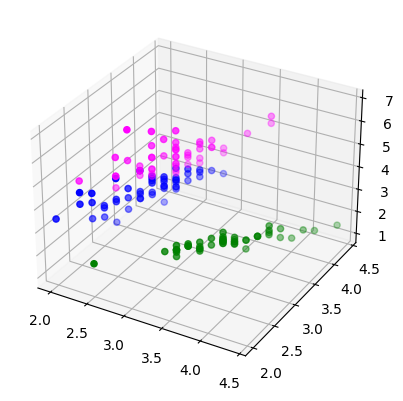

In [9]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

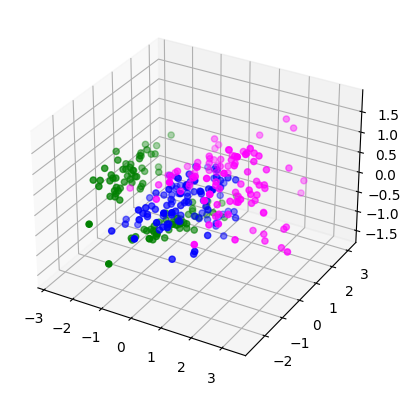

In [18]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')

# define PCA object (three components), fit and transform the data
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(Xpp)
Xpca = pca.transform(Xpp)

#print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
#axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


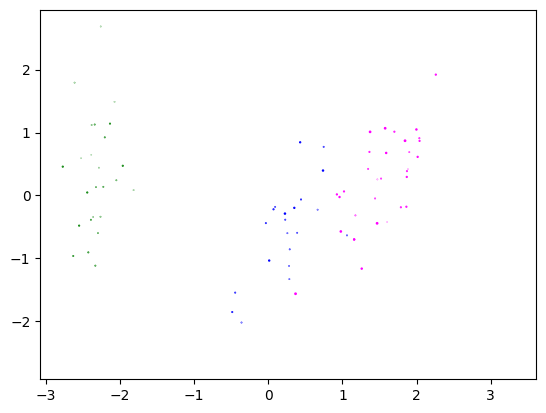

In [19]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')

# KNN classifier

(105, 4)
(45, 4)
[[14  0  0]
 [ 0 11  0]
 [ 0  2 18]]


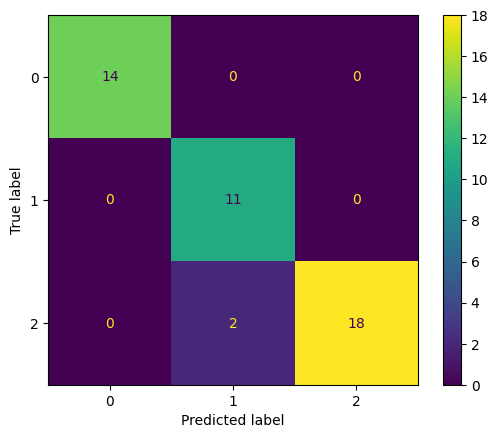

In [24]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



(105, 1)
(45, 1)
[[11  0  0]
 [ 0 13  5]
 [ 0  1 15]]


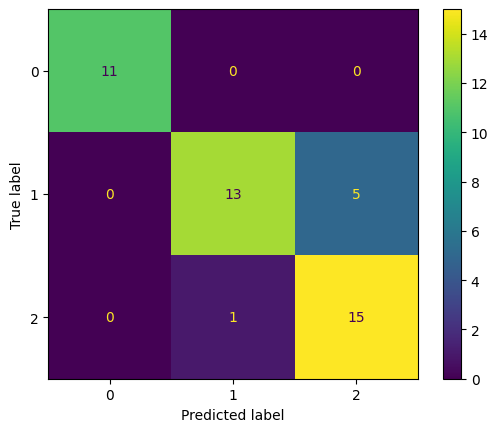

In [25]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca[:,0:1],y,test_size = 0.3)
print(Xpca_train.shape)
print(Xpca_test.shape)

knn2=KNeighborsClassifier(n_neighbors = 1)
knn2.fit(Xpca_train,ypca_train)
Ypred2=knn2.predict(Xpca_test)

matrix = confusion_matrix(ypca_test, Ypred2)
print(matrix)
ConfusionMatrixDisplay.from_predictions(ypca_test, Ypred2)

[[12  0  0]
 [ 0 10  5]
 [ 0  6 12]]


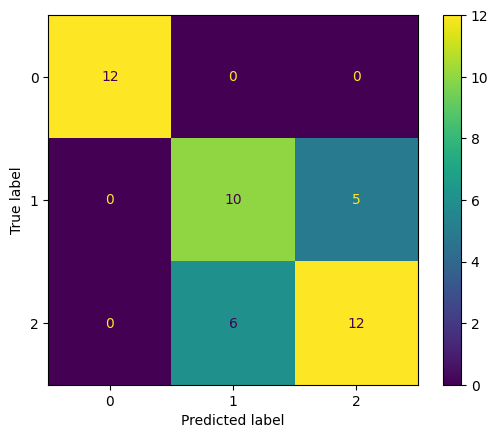

In [26]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_trainWrong, X_testWrong, y_trainWrong, y_testWrong = train_test_split(X[:,0:2], y, test_size=0.3)

knn3=KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_trainWrong, y_trainWrong)
Ypred3=knn3.predict(X_testWrong)

matrix = confusion_matrix(y_testWrong, Ypred3)
print(matrix)
ConfusionMatrixDisplay.from_predictions(y_testWrong, Ypred3)